In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from FRCfuncs import *
from scipy.optimize import curve_fit

## FRC power Series

In [ ]:
wdir = r'N:\Singlem\singlem19-1\March\18_PowerSeries_NV'

In [4]:
t0 = time.time()
wdir = r'N:\Singlem\singlem19-1\February\21_FRC_NV_CG'
powers = np.arange(0,101,10)
#Data waill be stored in a list. Each entry of list contains 3D image of type numpy array.
imStackLst = []
for power in powers:
    ext = r'PowerSeries\{0:d}pct_tac26-200\Red Photons'.format(power)
    filedir = os.path.join(wdir, ext)
    RedCh = readfolder(filedir)
    ext = r'PowerSeries\{0:d}pct_tac26-200\Green Photons'.format(power)
    filedir = os.path.join(wdir, ext)
    GreenCh = readfolder(filedir)
    imStackLst.append (RedCh + GreenCh)
t1 = time.time()
print ("computational time equals: " + str( t1 - t0))

computational time equals: 71.29131007194519


applied drift correction of 0.967046 nm in x and and -0.985416 nm in y.



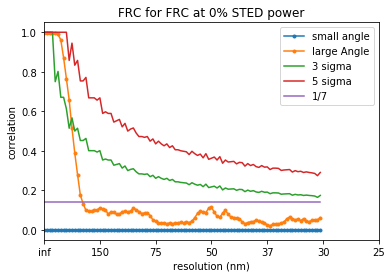

retrieved resolution for FRC at 0% STED power is: 214nm

applied drift correction of -1.106478 nm in x and and 0.962667 nm in y.



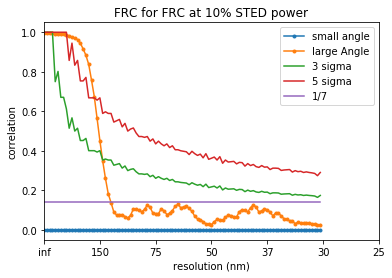

retrieved resolution for FRC at 10% STED power is: 125nm

applied drift correction of 2.169152 nm in x and and 0.207890 nm in y.



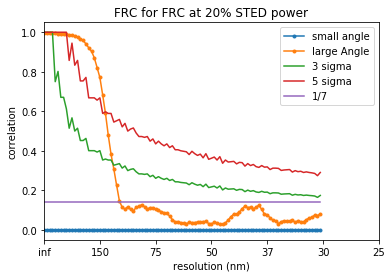

retrieved resolution for FRC at 20% STED power is: 107nm

applied drift correction of 1.695757 nm in x and and -3.313265 nm in y.



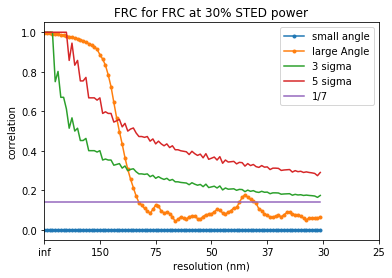

retrieved resolution for FRC at 30% STED power is: 88nm

applied drift correction of 1.518766 nm in x and and -1.482230 nm in y.



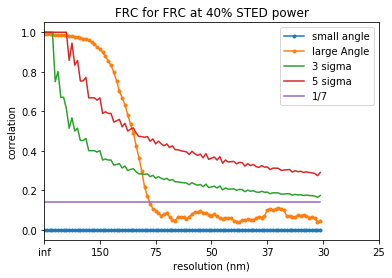

retrieved resolution for FRC at 40% STED power is: 79nm

applied drift correction of 1.332498 nm in x and and 2.645838 nm in y.



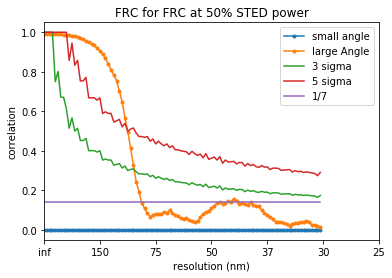

retrieved resolution for FRC at 50% STED power is: 86nm

applied drift correction of 0.552834 nm in x and and -2.827289 nm in y.



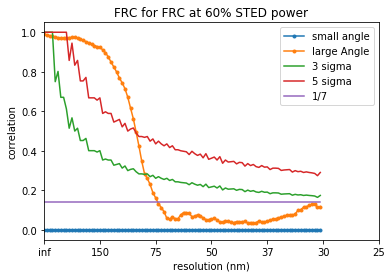

retrieved resolution for FRC at 60% STED power is: 73nm

applied drift correction of 1.458045 nm in x and and -1.441329 nm in y.



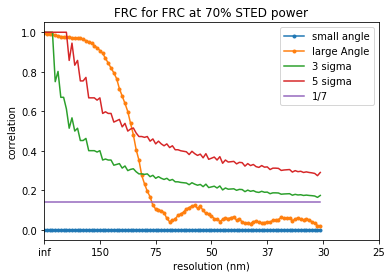

retrieved resolution for FRC at 70% STED power is: 77nm

applied drift correction of 1.599820 nm in x and and -2.005613 nm in y.



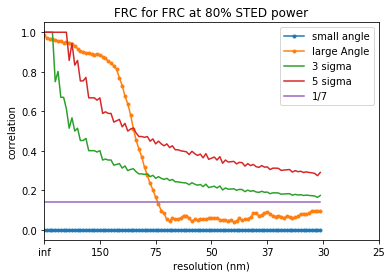

retrieved resolution for FRC at 80% STED power is: 73nm

applied drift correction of 5.327833 nm in x and and -1.233297 nm in y.



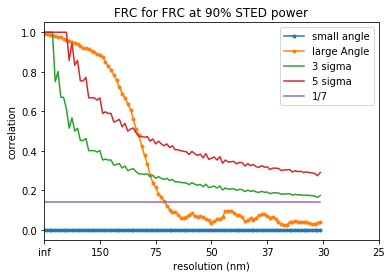

retrieved resolution for FRC at 90% STED power is: 68nm

applied drift correction of 6.132736 nm in x and and -3.336363 nm in y.



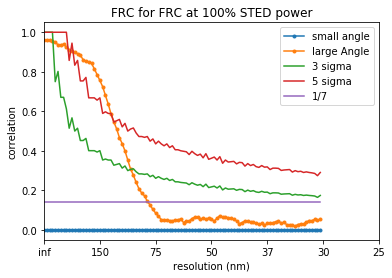

retrieved resolution for FRC at 100% STED power is: 79nm



In [5]:
Nimg = len(powers)
FRC = np.zeros(Nimg)
Bleaching = np.zeros(Nimg)
BleachingSigma = np.zeros(Nimg)
for i, imStack in enumerate(imStackLst):
    power = powers[i]
    #imA = np.sum(imStack[0:10], axis = 0)
    #imB = np.sum(imStack[10:20], axis =0)
    imA = imStack[0]
    imB = imStack[1]
    __, __, __, __, __, res = FRCAnalysis(imA, imB, 15, title = "FRC at " + str(power) + "% STED power")
    FRC[i] = res[0,0]

In [6]:
def inversesqrt(x, ConfocalRes, Is):
    return ConfocalRes/(1+np.sqrt(x)/Is)

def fitSTEDpower(STEDpower, STEDresolution, p0 = (240,10)):
    return curve_fit(inversesqrt, STEDpower, STEDresolution, p0 = p0)


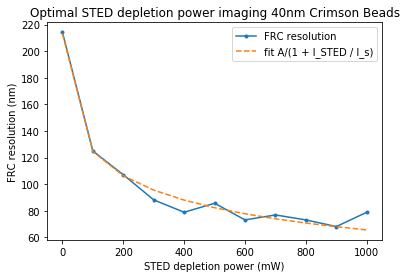

In [7]:
STEDpowers = powers*10
popt, pcov = fitSTEDpower(STEDpowers, FRC)
fitFRC = inversesqrt(STEDpowers, popt[0], popt[1])
plt.plot(STEDpowers,FRC, '.-', label = 'FRC resolution')
plt.plot(STEDpowers, fitFRC, '--', label = 'fit A/(1 + I_STED / I_s)')
plt.xlabel('STED depletion power (mW)')
plt.ylabel('FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging 40nm Crimson Beads')
plt.legend()
plt.savefig("40nmCrimsonSTEDpowerSeriesFRC_singleFrame.png", dpi = 300)
plt.show()
